# An√°lise de Custos M√©dicos com Python
### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

Aqui carregamos todas as bibliotecas necess√°rias para manipula√ß√£o de dados, visualiza√ß√£o e modelagem.

## Carregando e explorando o dataset

In [2]:
df = pd.read_csv('datasets/insurance.csv')

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Carregamos o dataset de despesas m√©dicas e verificamos suas primeiras linhas, tipos de dados, valores nulos e estat√≠sticas descritivas.

## An√°lise Explorat√≥ria

### Distribui√ß√£o de Idade

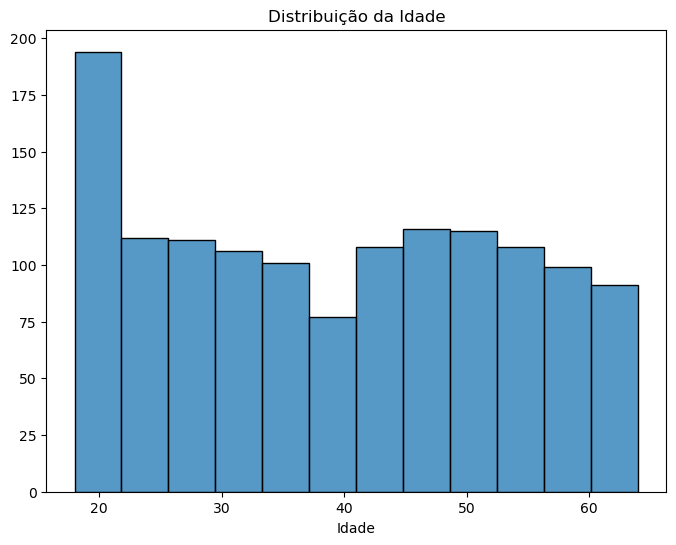

In [7]:
f, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x='age', ax=ax)
ax.set_title('Distribui√ß√£o da Idade')
ax.set_ylabel('')
ax.set_xlabel('Idade')
plt.show()

Visualizamos a distribui√ß√£o da idade dos segurados.

## Idade por Fumantes e N√£o Fumantes

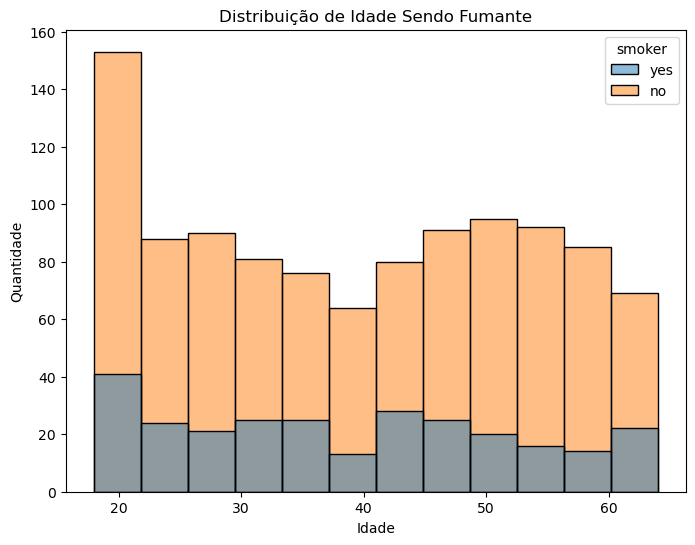

In [8]:
f, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x='age', hue='smoker', ax=ax)
ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade')
ax.set_title('Distribui√ß√£o de Idade Sendo Fumante')
plt.show()

Compara√ß√£o da idade entre fumantes e n√£o fumantes

## Distribui√ß√£o do IMC

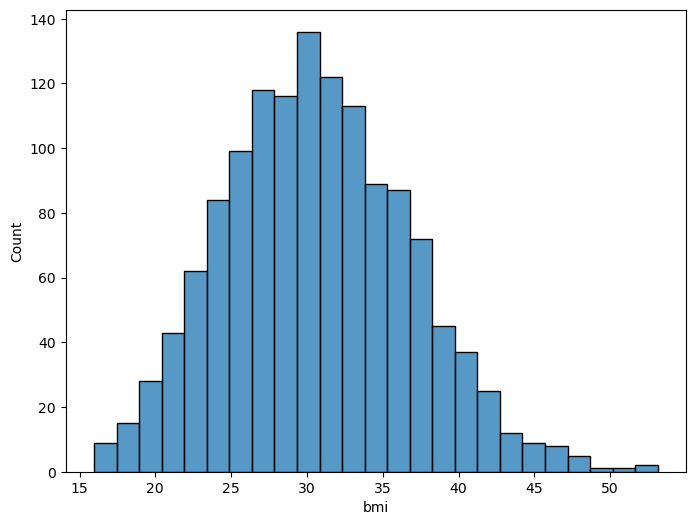

In [9]:
f, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x='bmi', ax=ax)
plt.show()

## Rela√ß√£o Idade x IMC

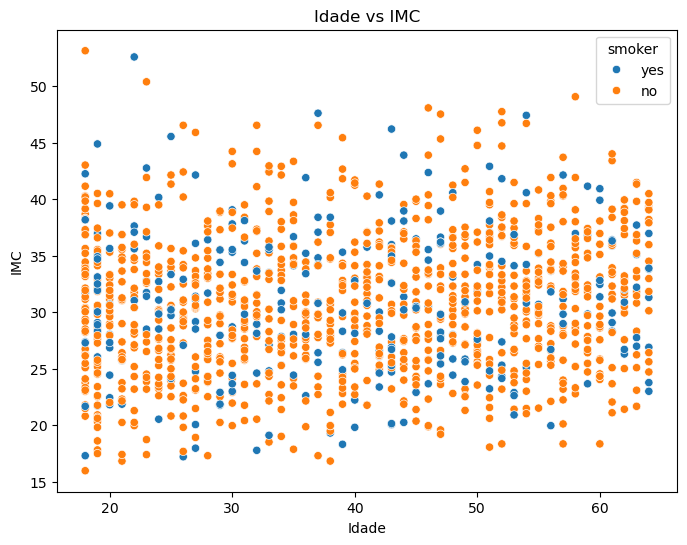

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(df, x='age', y='bmi',hue='smoker', ax=ax)
ax.set_title('Idade vs IMC')
ax.set_xlabel('Idade')
ax.set_ylabel('IMC')
plt.show()

## Estat√≠sticas do IMC por Fumantes

In [11]:
print(f'M√©dia de IMC dos fumantes: {df[df['smoker'] == 'yes']['bmi'].mean():.2f}')
print(f'M√©dia de IMC dos n√£o fumantes: {df[df['smoker'] == 'no']['bmi'].mean():.2f}')
print(f'Desvio padr√£o de IMC dos fumantes: {df[df['smoker'] == 'yes']['bmi'].std():.2f}')
print(f'Desvio padr√£o de IMC dos n√£o fumantes: {df[df['smoker'] == 'no']['bmi'].std():.2f}')

M√©dia de IMC dos fumantes: 30.71
M√©dia de IMC dos n√£o fumantes: 30.65
Desvio padr√£o de IMC dos fumantes: 6.32
Desvio padr√£o de IMC dos n√£o fumantes: 6.04


## Custos M√©dicos por Sexo e Fumante

/tmp/ipykernel_3524/2518283250.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feminino', 'Masculino'])


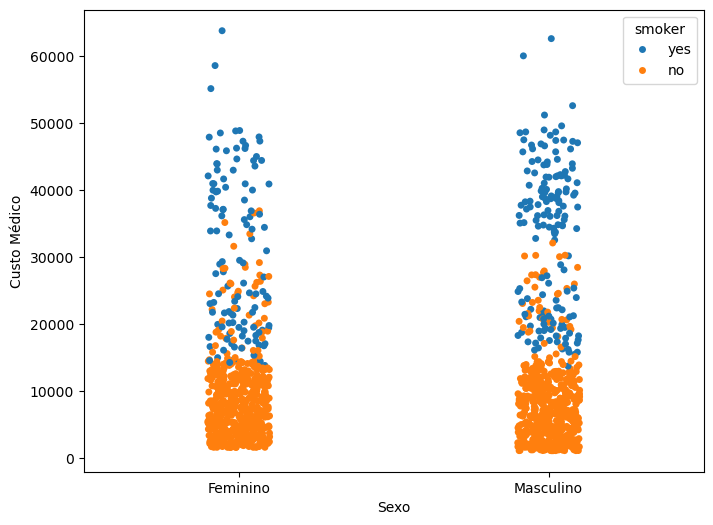

In [12]:
f, ax = plt.subplots(figsize=(8,6))
sns.stripplot(df, x="sex", y="charges", hue="smoker")
ax.set_xticklabels(['Feminino', 'Masculino'])
ax.set_ylabel('Custo M√©dico')
ax.set_xlabel('Sexo')
plt.show()

## Regress√£o Linear: Idade x Custo M√©dico

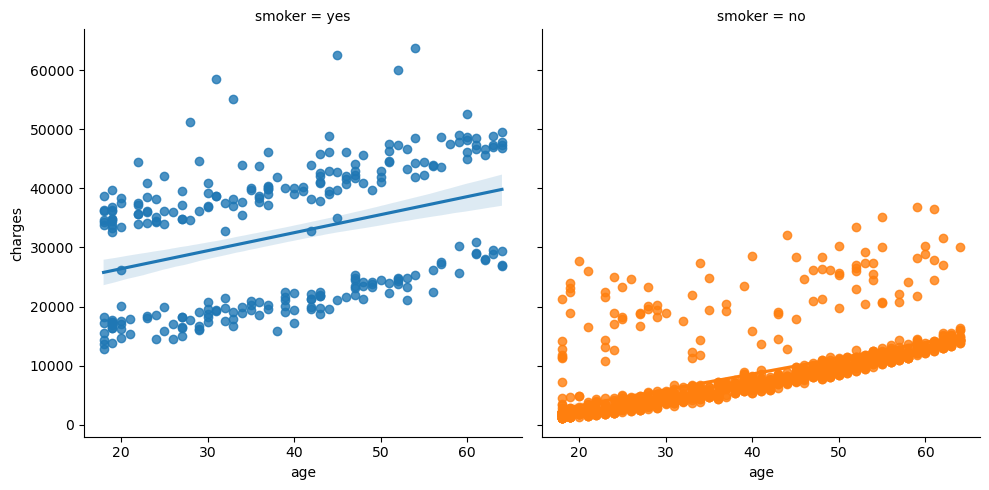

In [13]:
sns.lmplot(df, x="age", y="charges", hue='smoker' ,col='smoker')
plt.show()

## PairGrid: Explora√ß√£o m√∫ltiplas vari√°veis

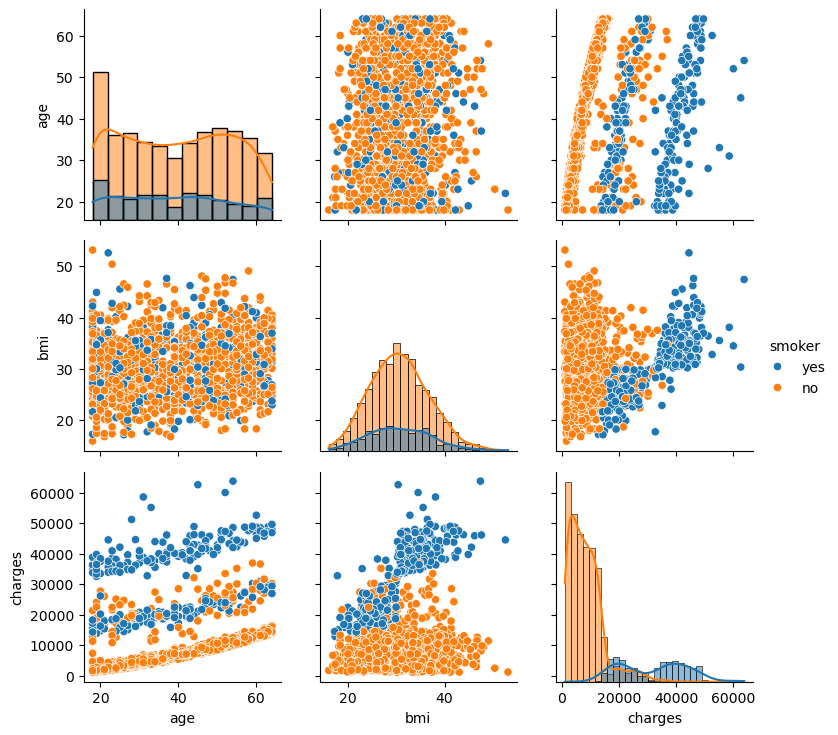

In [14]:
g = sns.PairGrid(df, hue="smoker", vars=["age","bmi","charges"])
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()

In [15]:
df[(df['charges'] >= 10000) & (df['charges'] <= 30000) & (df['smoker'] == 'no')]['age'].mean()

np.float64(51.99707602339181)

M√©dia de idade dos n√£o fumantes que tem um custo m√©dico entre 10k e 30k.

In [16]:
df[(df['charges'] >= 10000) & (df['charges'] <= 30000) & (df['smoker'] == 'no')]['bmi'].min()

18.335

# Pr√©-processamento de Dados

Separando features e target

In [17]:
X = df.drop("charges", axis=1)  # Features
y = df["charges"]               # Target

## One-Hot Encoding para vari√°veis categ√≥ricas

In [18]:
X = pd.get_dummies(X, columns=["sex","smoker","region"], drop_first=True)

In [19]:
X

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0     False        True             False   
1      18  33.770         1      True       False             False   
2      28  33.000         3      True       False             False   
3      33  22.705         0      True       False              True   
4      32  28.880         0      True       False              True   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3      True       False              True   
1334   18  31.920         0     False       False             False   
1335   18  36.850         0     False       False             False   
1336   21  25.800         0     False       False             False   
1337   61  29.070         0     False        True              True   

      region_southeast  region_southwest  
0                False              True  
1                 True             False  
2                 True             False  
3                False             False  
4                False             False  
...                ...               ...  
1333             False             False  
1334             False             False  
1335              True             False  
1336             False              True  
1337             False             False  

[1338 rows x 8 columns]

## Normaliza√ß√£o das vari√°veis num√©ricas

In [20]:
scaler = StandardScaler()
num_cols = ["age","bmi","children"]
X[num_cols] = scaler.fit_transform(X[num_cols])

In [21]:
X

age       bmi  children  sex_male  smoker_yes  region_northwest  \
0    -1.438764 -0.453320 -0.908614     False        True             False   
1    -1.509965  0.509621 -0.078767      True       False             False   
2    -0.797954  0.383307  1.580926      True       False             False   
3    -0.441948 -1.305531 -0.908614      True       False              True   
4    -0.513149 -0.292556 -0.908614      True       False              True   
...        ...       ...       ...       ...         ...               ...   
1333  0.768473  0.050297  1.580926      True       False              True   
1334 -1.509965  0.206139 -0.908614     False       False             False   
1335 -1.509965  1.014878 -0.908614     False       False             False   
1336 -1.296362 -0.797813 -0.908614     False       False             False   
1337  1.551686 -0.261388 -0.908614     False        True              True   

      region_southeast  region_southwest  
0                False              True  
1                 True             False  
2                 True             False  
3                False             False  
4                False             False  
...                ...               ...  
1333             False             False  
1334             False             False  
1335              True             False  
1336             False              True  
1337             False             False  

[1338 rows x 8 columns]

## Divis√£o treino/teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("‚úÖ Features depois do pr√©-processamento:\n", X.head())
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

‚úÖ Features depois do pr√©-processamento:
         age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614     False        True             False   
1 -1.509965  0.509621 -0.078767      True       False             False   
2 -0.797954  0.383307  1.580926      True       False             False   
3 -0.441948 -1.305531 -0.908614      True       False              True   
4 -0.513149 -0.292556 -0.908614      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

X_train shape: (1070, 8)
X_test shape: (268, 8)


## Modelo Random Forest

In [23]:
rf = RandomForestRegressor(
    n_estimators=100,   # n√∫mero de √°rvores
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Avalia√ß√£o do Modelo

In [24]:
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("üìä Avalia√ß√£o do Modelo Random Forest")
print(f"MAE  (Erro Absoluto M√©dio): {mae:.2f}")
print(f"RMSE (Raiz do Erro Quadr√°tico M√©dio): {rmse:.2f}")
print(f"R¬≤   (Coef. de Determina√ß√£o): {r2:.2f}")


üìä Avalia√ß√£o do Modelo Random Forest
MAE  (Erro Absoluto M√©dio): 2545.21
RMSE (Raiz do Erro Quadr√°tico M√©dio): 4567.96
R¬≤   (Coef. de Determina√ß√£o): 0.87


## An√°lise dos Res√≠duos

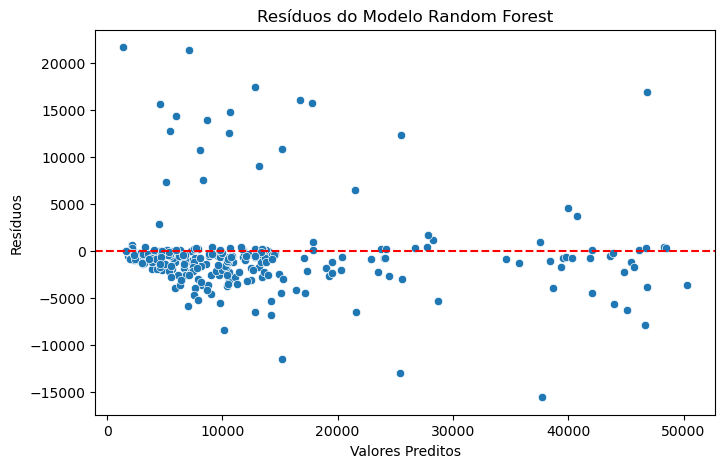

In [25]:
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores Preditos")
plt.ylabel("Res√≠duos")
plt.title("Res√≠duos do Modelo Random Forest")
plt.show()

## Valores Reais vs Preditos

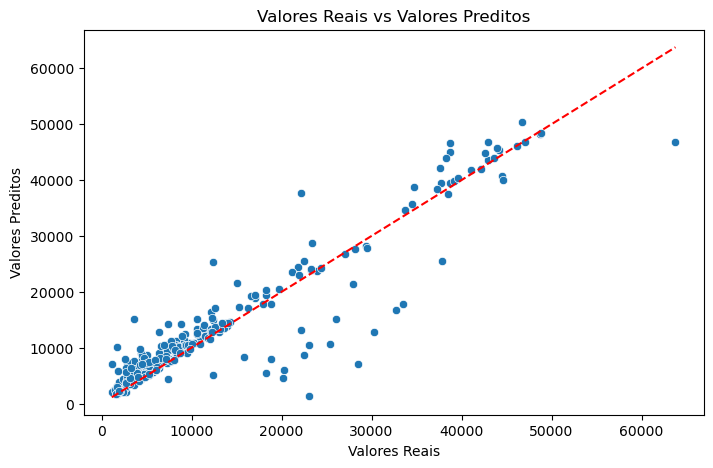

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Valores Reais vs Valores Preditos")
plt.show()

## Compara√ß√£o em Linha com Pontos

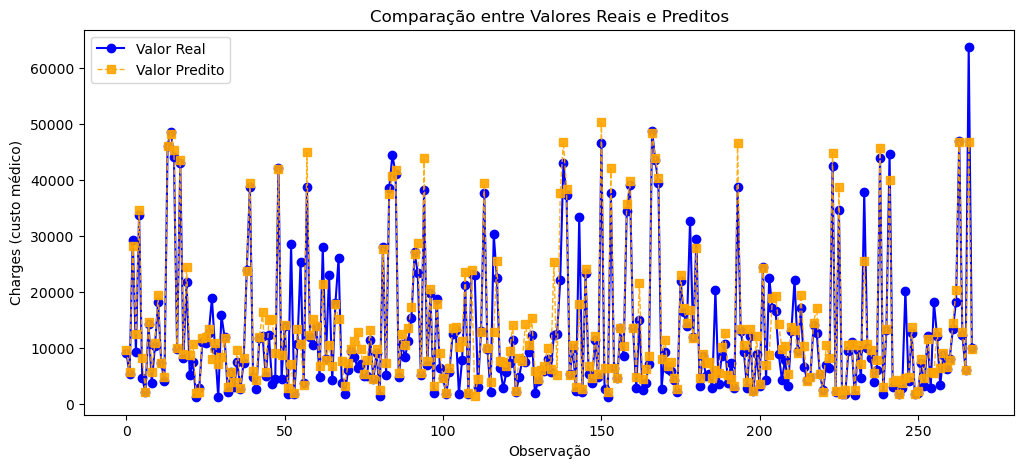

In [27]:
df_resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predito": y_pred
}).reset_index(drop=True)

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_resultados.index, df_resultados["Real"], marker="o", color="blue", label="Valor Real")
plt.plot(df_resultados.index, df_resultados["Predito"], marker="s", 
         color="orange", linestyle="--", linewidth=1, alpha=0.9, label="Valor Predito")
plt.xlabel("Observa√ß√£o")
plt.ylabel("Charges (custo m√©dico)")
plt.title("Compara√ß√£o entre Valores Reais e Preditos")
plt.legend()
plt.show()

Neste notebook, exploramos e modelamos o dataset de despesas m√©dicas passo a passo:

Explora√ß√£o de dados:

Visualizamos distribui√ß√µes de idade, IMC, sexo e h√°bitos de fumar.

Identificamos diferen√ßas claras entre fumantes e n√£o fumantes nos custos m√©dicos.

Pr√©-processamento:

Tratamos vari√°veis categ√≥ricas com One-Hot Encoding.

Padronizamos as vari√°veis num√©ricas com StandardScaler.

Dividimos os dados em conjuntos de treino e teste.

Modelagem:

Aplicamos Random Forest Regressor para prever os custos m√©dicos.

Avaliamos o modelo com m√©tricas como MAE, RMSE e R¬≤.

An√°lise de resultados:

Gr√°ficos de res√≠duos e de valores reais vs preditos mostraram que o modelo captura bem a tend√™ncia geral.

Barras de erro ajudaram a identificar observa√ß√µes com maiores desvios, permitindo insights sobre poss√≠veis outliers ou padr√µes espec√≠ficos.

Insights principais:

Fumantes tendem a ter custos m√©dicos significativamente maiores.

O IMC e a idade influenciam nos gastos, mas a rela√ß√£o n√£o √© totalmente linear, justificando o uso do Random Forest.

O modelo consegue capturar padr√µes gerais, mas pequenas diferen√ßas ainda aparecem, indicando oportunidades para ajustes futuros ou inclus√£o de novas vari√°veis.

Pr√≥ximos passos poss√≠veis:

Testar outros modelos (Gradient Boosting, XGBoost) para compara√ß√£o de performance.

Ajustar hiperpar√¢metros do Random Forest com GridSearchCV.

Explorar novas vari√°veis que possam impactar o custo m√©dico (ex: hist√≥rico familiar, h√°bitos de atividade f√≠sica, dieta).

Este notebook serve como um guia completo de an√°lise explorat√≥ria, pr√©-processamento e modelagem de Machine Learning em datasets de sa√∫de, mostrando como extrair insights importantes e avaliar a performance de modelos preditivos.